## Support Vector Machines (SVM)

Support vector machines (SVM) algorithm is a <b>non-probabilistic model</b> that can be used to solve both regression and classification tasks.

<b>Main objective of SVM for classification</b>: Create a hyperplane with parallel margin planes that passes through the nearest point for every class with <b>largest margin distance</b>.

<b>Main objective of SVM for regression</b>: Create a hyperplane with parallel margin planes that have the <b>smallest margin distance</b>, where majority of the points lie in between margin planes.

Support vectors are points that lie on the marginal plane that is parallel to the hyperplane.

SVM is mostly suitable for linearly seperable points, but SVM can also be used for non-linearly seperable points by using the kernel trick.

<b>Assumptions of SVM as linear classifiers</b>:

1. The margin should be as large as possible between different classes

2. Support vectors are the most useful data points, which are most likely to be incorrectly classified.

3. Data is independent and identically distributed

<b>Requirement of feature scaling: Yes</b>

<b>Robust to outliers: No </b>

<b>Advantages of SVM:</b>
1. Regularization capabilities which prevents model overfitting

2. Ability to handle non-linear data using kernel trick

3. Solves both classification and regression tasks

4. Small change in data points does not result changes in hyperplane of model, thus SVM model is considered stable.

5. Works well on high-dimensional features

6. Effective when the number of dimensions is greater than the number of samples.

7. Memory efficient, as it only uses subset of training points in the decision function (support vectors)

<b>Disadvantages of SVM:</b>
1. Selection of kernel is difficult, as high-dimensional kernels may result in too many support vectors which reduces speed of model training

2. Memory requirement is large, as support vectors grow in size with training dataset size.

3. Longer training time required on large datasets.

4. Difficult to interpret

5. Not robust to outliers

6. Probability estimates not provided directly, instead they are obtained through cross validation which is computationally expensive

<b>Time complexity of model training: O(n^2)</b>

<b>Time complexity of model prediction: O(s*d)</b>

<b>Space complexity of model prediction: O(s)</b>

n - Number of training samples

s - Number of support vectors

d - Number of features

<b>Methods to handle imbalanced dataset</b>:
1. Assign class weights to model
2. Resampling techniques (Oversampling/SMOTETomek)

## Hard margin vs Soft margin in SVM

When data points are perfectly linearly separable, hard margin objective can be used as follows for model training (Max-margin classifier):

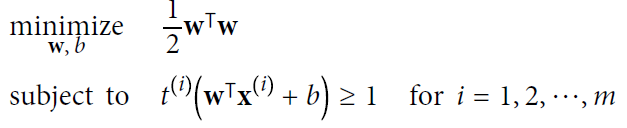

- Summation of squared coefficients equals to one
- distance of points from hyperplane to points are orthogonal and greater than or equal to 1

However, when data points are not linearly separable, soft margin objective can be used as follows for model training, which allows better bias-variance tradeoff:

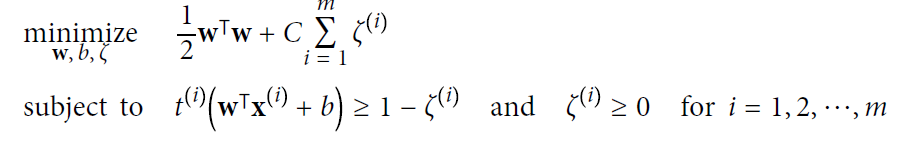

- Summation of squared coefficients equals to one
- Summation of epsilon terms less than or equal to C
- distance of points from hyperplane to points are orthogonal and greater than or equal to 1 - epsilon

Note that soft margin objective introduces two new hyperparameters in sklearn:
1. <b>C</b>: Regularization hyperparameter. The larger the value of C, the less regularized the SVM model is.
2. <b>epsilon</b>: Controls distance between hyperplane and a parallel margin plane (For regression only)

## Dual vs Primal Form of SVM

Given that both hard margin and soft margin objectives are convex quadratic optimization problems with linear constraints, they are known as <b>Primal form of SVM</b>.

A different method to rexpress both hard and soft margin objectives is by using <b>dual form of SVM</b>, which gives the same solution as primal form of SVM.

<b>Dual form of SVM is suitable to use under the following scenarios</b>:
1. Using kernel tricks on non-linearly separable data points
2. Number of training instances smaller than number of features

<b>Primal form of SVM is suitable to use under the following scenarios</b>:
1. Data points are linearly separable
2. Number of training instances larger than number of features

Note that the option of using dual vs primal form is only available in <b>LinearSVC and LinearSVR</b> algorithm for sklearn.

## Kernel Trick of SVM

SVM kernels convert lower-dimension data to higher dimension data for creating hyperplanes to seperate points without requiring additional calculation of distances by using pre-defined mathematical functions.

These kernel functions are based on two points only (inner dot product to reduce complexity of feature space and computation time), which quantifies similarity between low dimensional space and high dimensional space

The following are the most common kernels available in SVM with its following formulas:
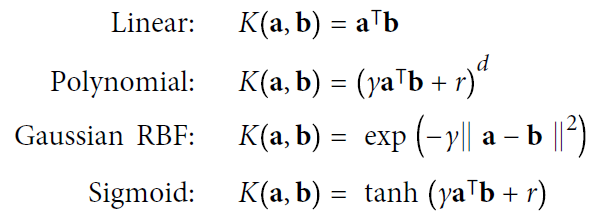

Note that the use of kernel types in SVM requires hyperparameter tuning.

<b>Gamma hyperparameter, γ</b> for poly, rbf and sigmoid defines how far the influence of single training example reaches.

The larger the value of gamma, SVM is more prone to model overfitting and vice versa.

## SVM Classifier Example

Refer to the following documentation for more details about the use of SVM Classification on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

The following example below illustrates the process of creating a SVM classification model using sklearn library after feature engineering.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn.datasets import fetch_kddcup99
import missingno
from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, roc_auc_score, classification_report
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
dataset = fetch_kddcup99()
data = pd.concat([pd.DataFrame(dataset['data'], columns=dataset['feature_names']),
                  pd.DataFrame(dataset['target'], columns=dataset['target_names'])],axis=1)
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,b'tcp',b'http',b'SF',181,5450,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,9,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,b'normal.'
1,0,b'tcp',b'http',b'SF',239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,b'normal.'
2,0,b'tcp',b'http',b'SF',235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
3,0,b'tcp',b'http',b'SF',219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,b'normal.'
4,0,b'tcp',b'http',b'SF',217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [3]:
# Checking for duplicated rows if exist
data[data.duplicated()]

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
2500,0,b'tcp',b'http',b'SF',307,60990,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2864,0,b'tcp',b'http',b'SF',351,11485,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,16,16,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
2977,0,b'tcp',b'http',b'SF',506,2419,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3003,0,b'tcp',b'http',b'SF',319,1374,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
3130,0,b'tcp',b'http',b'SF',234,1212,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493142,0,b'tcp',b'http',b'SF',303,480,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,11,11,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493168,0,b'tcp',b'http',b'SF',230,43464,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493325,0,b'tcp',b'http',b'SF',337,398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'
493750,0,b'tcp',b'http',b'SF',206,998,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,255,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'normal.'


In [4]:
# Removing duplicated records if exist
data = data.drop_duplicates().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 42 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [5]:
data.nunique()

duration                        2495
protocol_type                      3
service                           66
flag                              11
src_bytes                       3300
dst_bytes                      10725
land                               2
wrong_fragment                     3
urgent                             4
hot                               22
num_failed_logins                  6
logged_in                          2
num_compromised                   23
root_shell                         2
su_attempted                       3
num_root                          20
num_file_creations                18
num_shells                         3
num_access_files                   7
num_outbound_cmds                  1
is_host_login                      1
is_guest_login                     2
count                            490
srv_count                        470
serror_rate                       92
srv_serror_rate                   51
rerror_rate                       77
s

Since num_outbound_cmds and is_host_login variables have only 1 unique value, both variables can be removed from the dataset.

In [6]:
data = data.drop(['num_outbound_cmds','is_host_login'],axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   duration                     145586 non-null  object
 1   protocol_type                145586 non-null  object
 2   service                      145586 non-null  object
 3   flag                         145586 non-null  object
 4   src_bytes                    145586 non-null  object
 5   dst_bytes                    145586 non-null  object
 6   land                         145586 non-null  object
 7   wrong_fragment               145586 non-null  object
 8   urgent                       145586 non-null  object
 9   hot                          145586 non-null  object
 10  num_failed_logins            145586 non-null  object
 11  logged_in                    145586 non-null  object
 12  num_compromised              145586 non-null  object
 13  root_shell    

In [7]:
data[np.array(data.columns[22:29])] = data[np.array(data.columns[22:29])].astype('float')
data[np.array(data.columns[31:39])] = data[np.array(data.columns[31:39])].astype('float')
data[['protocol_type','service','flag','labels']] = data[['protocol_type','service','flag','labels']].applymap(
                                                    lambda x: x.decode('ascii'))

In [8]:
data['labels'].value_counts()/len(data['labels'])

normal.             0.603300
neptune.            0.355941
back.               0.006649
teardrop.           0.006306
satan.              0.006223
warezclient.        0.006134
ipsweep.            0.004472
smurf.              0.004403
portsweep.          0.002857
pod.                0.001415
nmap.               0.001085
guess_passwd.       0.000364
buffer_overflow.    0.000206
warezmaster.        0.000137
land.               0.000131
imap.               0.000082
rootkit.            0.000069
loadmodule.         0.000062
ftp_write.          0.000055
multihop.           0.000048
phf.                0.000027
perl.               0.000021
spy.                0.000014
Name: labels, dtype: float64

In [9]:
data['labels'] = data['labels'].map(lambda x: 'others' if x not in ['normal.','neptune.'] else x)
data['labels'].value_counts()/len(data['labels'])

normal.     0.603300
neptune.    0.355941
others      0.040759
Name: labels, dtype: float64

In [10]:
integer_columns = np.array(data.select_dtypes(include='object').drop(['protocol_type','service','flag','labels'],axis=1).columns)
data[integer_columns] = data[integer_columns].astype('int')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145586 entries, 0 to 145585
Data columns (total 40 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   duration                     145586 non-null  int32  
 1   protocol_type                145586 non-null  object 
 2   service                      145586 non-null  object 
 3   flag                         145586 non-null  object 
 4   src_bytes                    145586 non-null  int32  
 5   dst_bytes                    145586 non-null  int32  
 6   land                         145586 non-null  int32  
 7   wrong_fragment               145586 non-null  int32  
 8   urgent                       145586 non-null  int32  
 9   hot                          145586 non-null  int32  
 10  num_failed_logins            145586 non-null  int32  
 11  logged_in                    145586 non-null  int32  
 12  num_compromised              145586 non-null  int32  
 13 

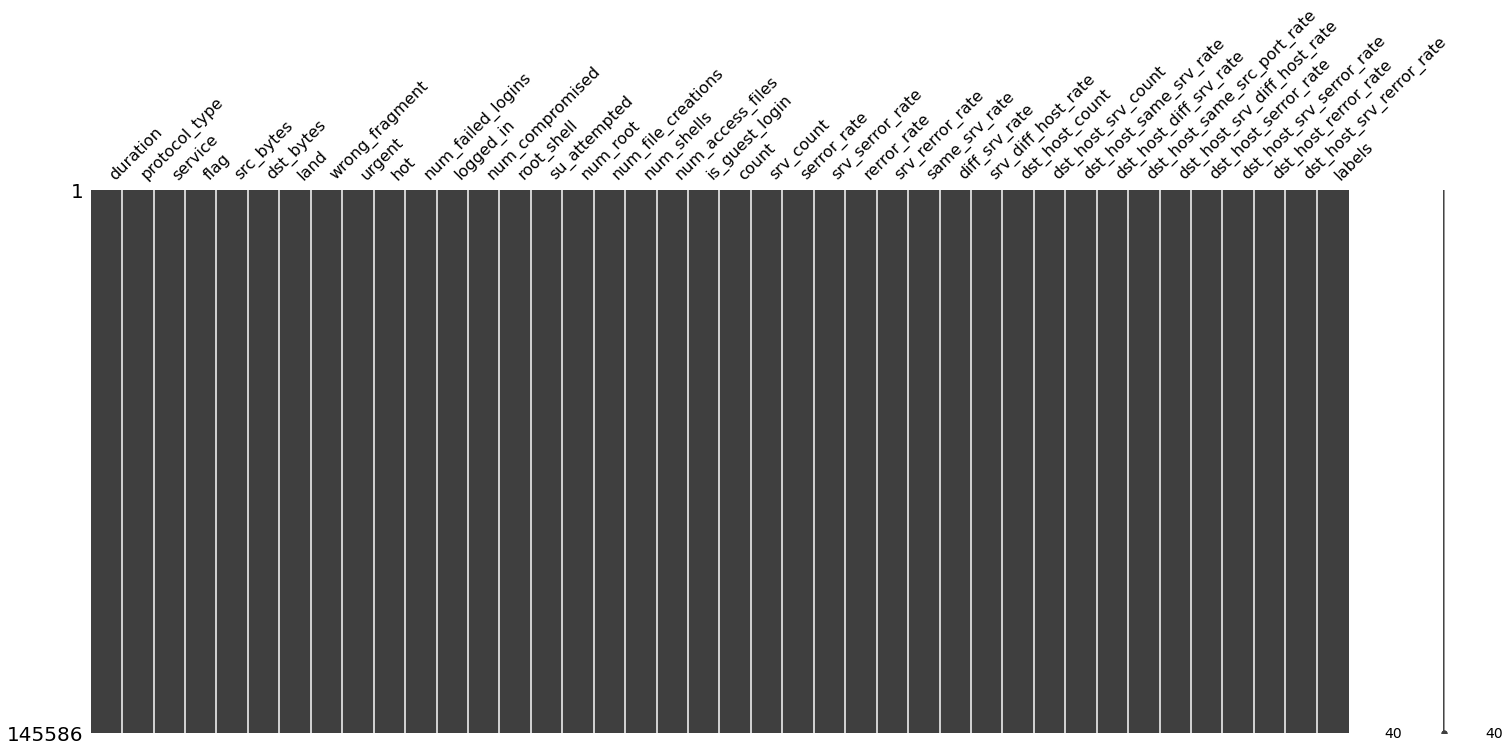

In [11]:
# Checking for missing values of features and labels if exist
missingno.matrix(data)
plt.show()

In [12]:
for column in data.columns[data.nunique()<30]:
    print(data[column].value_counts()/len(data))
    print('')

tcp     0.899214
udp     0.084259
icmp    0.016526
Name: protocol_type, dtype: float64

SF        0.600738
S0        0.290399
REJ       0.101054
RSTO      0.003908
RSTR      0.002919
S1        0.000392
SH        0.000234
S2        0.000165
RSTOS0    0.000076
S3        0.000069
OTH       0.000048
Name: flag, dtype: float64

0    0.999863
1    0.000137
Name: land, dtype: float64

0    0.992300
3    0.006251
1    0.001449
Name: wrong_fragment, dtype: float64

0    0.999973
1    0.000014
2    0.000007
3    0.000007
Name: urgent, dtype: float64

0     0.986558
2     0.006580
28    0.001882
1     0.001752
4     0.000769
6     0.000714
5     0.000350
3     0.000261
14    0.000254
30    0.000192
22    0.000192
19    0.000158
24    0.000089
18    0.000089
20    0.000069
7     0.000034
17    0.000014
12    0.000014
16    0.000007
10    0.000007
15    0.000007
9     0.000007
Name: hot, dtype: float64

0    0.999567
1    0.000392
2    0.000021
5    0.000007
4    0.000007
3    0.000007
Name: num_fa

In [13]:
X = data.drop(['labels'],axis=1)
y = data['labels']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [15]:
# Checking number of unique categories for service variable
X_train['service'].nunique()

64

In [16]:
# Checking frequency of each category type for service variable
X_train['service'].value_counts()

http           43418
private        34362
smtp            6825
domain_u        3774
other           3363
ftp_data        3219
ecr_i            726
eco_i            642
ftp              562
finger           453
telnet           383
urp_i            308
ntp_u            209
auth             207
pop_3            154
time             105
mtp               86
iso_tsap          84
csnet_ns          84
discard           82
sql_net           82
vmnet             81
domain            80
gopher            80
whois             80
rje               79
systat            79
remote_job        79
klogin            78
echo              78
imap4             78
hostnames         77
supdup            76
kshell            75
bgp               73
login             73
nntp              73
ssh               73
nnsp              72
pop_2             72
shell             72
courier           72
printer           71
netbios_ssn       71
uucp_path         70
Z39_50            69
sunrpc            69
netbios_dgm  

In [17]:
# Hash encoding on Service variable
hashencoder = ce.hashing.HashingEncoder(cols='service', n_components=8)
X_train_encoded = hashencoder.fit_transform(X_train, y_train)
X_test_encoded = hashencoder.transform(X_test, y_test)

X_train_encoded = X_train_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})
X_test_encoded = X_test_encoded.rename(columns = {'col_0':'service_hash1','col_1':'service_hash2','col_2':'service_hash3',
                                  'col_3':'service_hash4','col_4':'service_hash5','col_5':'service_hash6',
                                  'col_6':'service_hash7','col_7':'service_hash8'})

In [18]:
# One hot encoding on protocol_type and flag variable
onehotencoder = ce.OneHotEncoder(cols=['protocol_type','flag'])
X_train_encoded = onehotencoder.fit_transform(X_train_encoded)
X_test_encoded = onehotencoder.transform(X_test_encoded)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

In [20]:
# SVC with default hyperparameters
clf = SVC(C=1.0,kernel='rbf', probability=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))
print(f"R squared: {clf.score(X_test_scaled, y_test)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr', average = 'weighted')}")

              precision    recall  f1-score   support

    neptune.   0.999744  0.999936  0.999840     15596
     normal.   0.997613  0.998710  0.998161     26360
      others   0.980450  0.962209  0.971244      1720

    accuracy                       0.997710     43676
   macro avg   0.992602  0.986952  0.989748     43676
weighted avg   0.997698  0.997710  0.997700     43676

R squared: 0.9977104130414873
ROC AUC Score: 0.9997393123928295


In [21]:
def cf_matrix_plot(cf_matrix, labeled):
    """
        Plots a confusion matrix for binary classification problem using heatmaps.
    """
    group_counts = [f"{value}" for value in cf_matrix.flatten()]
    group_percentages = [f"{value:.2f}%" for value in cf_matrix.flatten()/np.sum(cf_matrix)*100]
    labels = [f"{v2}\n{v3}" for v2, v3 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(3,3)
    plt.figure(figsize=(15,8))
    sns.heatmap(cf_matrix, annot=labels, fmt='', xticklabels=labeled,yticklabels=labeled)
    plt.xlabel('Predicted labels')
    plt.ylabel('Actual labels')
    plt.show()

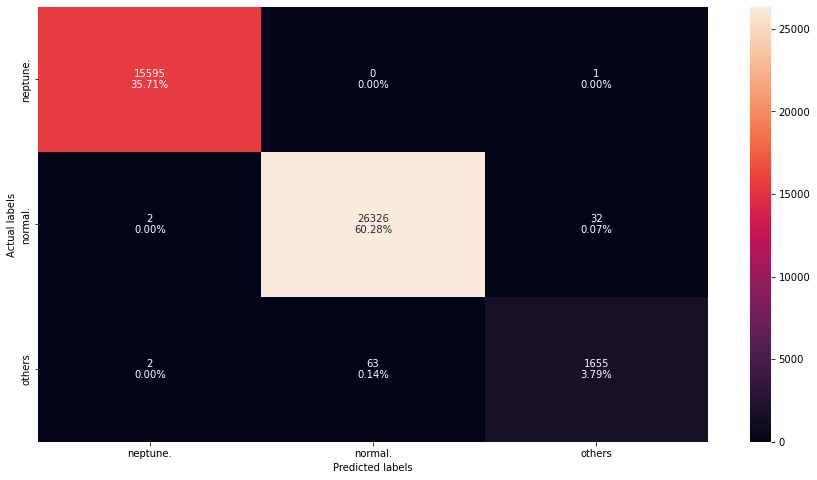

In [22]:
# Confusion matrix heatmap for SVC with default hyperparameters
y_pred = clf.predict(X_test_scaled)    
cf_matrix = confusion_matrix(y_test,y_pred)
cf_matrix_plot(cf_matrix,['neptune.','normal.','others'])

C=0.1
C=0.42222222222222217
C=0.7444444444444444
C=1.0666666666666667
C=1.3888888888888888
C=1.711111111111111
C=2.033333333333333
C=2.3555555555555556
C=2.6777777777777776
C=3.0
Maximum ROC AUC Score: 0.9998296513315923 at C = 3.0


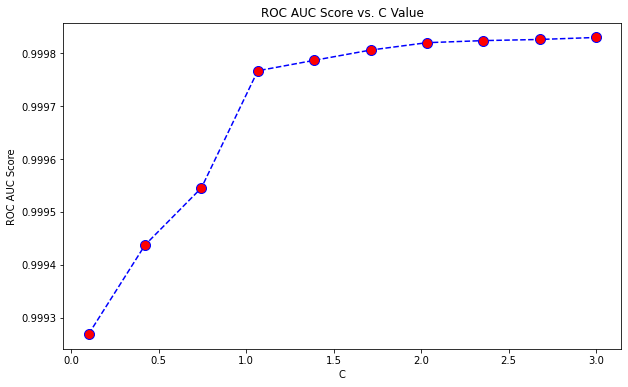

In [23]:
# Plot between ROC AUC score and hyperparameter C
roc_auc_rate = []
for c in np.linspace(0.1,3,10):
    clf = SVC(C=c,kernel='rbf', probability=True)
    clf.fit(X_train_scaled, y_train)
    pred_i = clf.predict_proba(X_test_scaled)
    roc_auc_rate.append(roc_auc_score(y_test,pred_i,multi_class='ovr',average='weighted'))
    print(f"C={c}")
plt.figure(figsize=(10,6))
plt.plot(np.linspace(0.1,3,10), roc_auc_rate, color='blue', 
         linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('ROC AUC Score vs. C Value')
plt.xlabel('C')
plt.ylabel('ROC AUC Score')
print("Maximum ROC AUC Score:",max(roc_auc_rate),"at C =",np.linspace(0.1,3,10)[np.argmax(roc_auc_rate)])

In [24]:
# SVC with RBF kernel on balanced class weights
clf = SVC(C=1.0,kernel='rbf', class_weight='balanced', probability=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))
print(f"R squared: {clf.score(X_test_scaled, y_test)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr')}")

              precision    recall  f1-score   support

    neptune.   0.999744  0.999808  0.999776     15596
     normal.   0.999049  0.995865  0.997454     26360
      others   0.938991  0.984302  0.961113      1720

    accuracy                       0.996817     43676
   macro avg   0.979261  0.993325  0.986114     43676
weighted avg   0.996932  0.996817  0.996852     43676

R squared: 0.9968174741276674
ROC AUC Score: 0.9994872245209091


In [25]:
# Bayes search cv on SVC with balanced class weight
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
params = {'kernel':Categorical(['rbf','linear','poly','sigmoid']), 
          'degree': Integer(3,6), 
          'gamma': Categorical(['scale','auto']),
          'C': Real(0.01,5)}

clf_cv = BayesSearchCV(SVC(class_weight='balanced'),params,cv=5,verbose=1,n_jobs=-1)
clf_cv.fit(X_train_scaled, y_train)
clf_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\yixia\anaconda3\envs\Data_Science\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


OrderedDict([('C', 4.510694795356237),
             ('degree', 3),
             ('gamma', 'scale'),
             ('kernel', 'poly')])

In [26]:
# SVC with RBF kernel on balanced class weights with best hyperparameters from Bayes search CV
clf = SVC(C=clf_cv.best_params_['C'], kernel=clf_cv.best_params_['kernel'], gamma = clf_cv.best_params_['gamma'],
          class_weight='balanced', degree = clf_cv.best_params_['degree'], probability=True)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)
print(classification_report(y_test,y_pred,digits=6))
print(f"R squared: {clf.score(X_test_scaled, y_test)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, clf.predict_proba(X_test_scaled), multi_class='ovr')}")

              precision    recall  f1-score   support

    neptune.   0.999936  0.999679  0.999808     15596
     normal.   0.998745  0.996396  0.997569     26360
      others   0.944009  0.980233  0.961780      1720

    accuracy                       0.996932     43676
   macro avg   0.980897  0.992103  0.986386     43676
weighted avg   0.997015  0.996932  0.996959     43676

R squared: 0.996931953475593
ROC AUC Score: 0.9985100356134188


## SVM Regressor Example

Refer to the following documentation for more details about the use of SVM Regression on sklearn library:

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html

The following example below illustrates the process of creating a SVM regression model using sklearn library.

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error

In [28]:
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'])

In [29]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# SVR with default hyperparameters
reg = SVR()
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f"R-squared value: {reg.score(X_test_scaled,y_test)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_pred,y_test))}")

R-squared value: 0.7429564093473553
Test RMSE: 0.5854058193777475


In [33]:
params = {'kernel':Categorical(['rbf','linear','poly','sigmoid']), 
          'degree': Integer(3,6), 
          'gamma': Categorical(['scale','auto']),
          'C': Real(0.01,5),
          'epsilon': Real(0.1,1)}

reg_cv = BayesSearchCV(SVR(),params,cv=5, scoring= 'neg_root_mean_squared_error',verbose=1,n_jobs=-1)
reg_cv.fit(X_train_scaled, y_train)
reg_cv.best_params_

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

OrderedDict([('C', 4.499198077856392),
             ('degree', 5),
             ('epsilon', 0.5060504986242843),
             ('gamma', 'auto'),
             ('kernel', 'rbf')])

In [35]:
# SVR with best parameters from Bayes Search CV
reg = SVR(C=reg_cv.best_params_['C'], kernel=reg_cv.best_params_['kernel'],
          epsilon=reg_cv.best_params_['epsilon'], gamma = reg_cv.best_params_['gamma'])
reg.fit(X_train_scaled, y_train)
y_pred = reg.predict(X_test_scaled)
print(f"R-squared value: {reg.score(X_test_scaled,y_test)}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_pred,y_test))}")

R-squared value: 0.7571641266476046
Test RMSE: 0.5689971193797376
